TypeError: 'int' object is not subscriptable

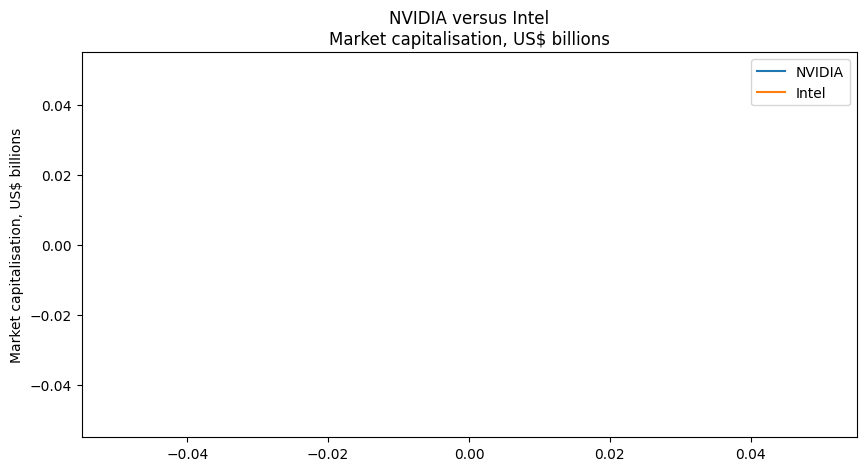

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

plt.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'

# Define the start and end dates for the data
start_date = "2014-01-01"
end_date = "2024-02-24"

# test
import yfinance as yf

tickers = yf.Tickers('NVDA INTC')
nvidia_data = tickers.tickers['NVDA'].history(period="120mo").reset_index()['Close'].to_list()
intel_data = tickers.tickers['INTC'].history(period="120mo").reset_index()['Close'].to_list()

# Create a date range for weekly data points
dates = len(nvidia_data) #pd.date_range(start=start_date, end=end_date, freq='W')

# # Generate random data for NVIDIA and Intel
# np.random.seed(0)
# nvidia_data = np.abs(np.random.normal(loc=0.0, scale=10.0, size=len(dates))).cumsum()
# intel_data = np.abs(np.random.normal(loc=0.0, scale=10.0, size=len(dates))).cumsum()

# # Normalize the data
# nvidia_data = nvidia_data / nvidia_data.max() * 262.0
# intel_data = intel_data / intel_data.max() * 166.6

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 5))
line_nvidia, = ax.plot([], [], label='NVIDIA')
line_intel, = ax.plot([], [], label='Intel')
ax.set_title('NVIDIA versus Intel\nMarket capitalisation, US$ billions')
ax.set_ylabel('Market capitalisation, US$ billions')
ax.legend()

# Initialize text labels for the last date valuations
text_nvidia = ax.text(0, 0, '', ha='left', va='center')
text_intel = ax.text(0, 0, '', ha='left', va='center')

def init():
    ax.set_xlim(dates[0], dates[-1])
    ax.set_ylim(min(nvidia_data.min(), intel_data.min()), max(nvidia_data.max(), intel_data.max()))
    return line_nvidia, line_intel, text_nvidia, text_intel

def update(frame):
    line_nvidia.set_data(dates[:frame], nvidia_data[:frame])
    line_intel.set_data(dates[:frame], intel_data[:frame])
    text_nvidia.set_position((dates[frame-1], nvidia_data[frame-1]))
    text_intel.set_position((dates[frame-1], intel_data[frame-1]))
    text_nvidia.set_text(f'{nvidia_data[frame-1]:.2f}')
    text_intel.set_text(f'{intel_data[frame-1]:.2f}')
    return line_nvidia, line_intel, text_nvidia, text_intel

ani = FuncAnimation(fig, update, frames=dates, init_func=init, blit=True, repeat=False)

# Save the animation
writer = FFMpegWriter(fps=24)
ani.save('./output/nvidia_intel_race.mp4', writer=writer)

plt.close(fig)


In [20]:
import yfinance as yf

tickers = yf.Tickers('NVDA INTC')
tickers.tickers['NVDA'].history(period="120mo").reset_index()[['Date','Close']]
tickers.tickers['INTC'].history(period="120mo").reset_index()[['Date','Close']]